In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [2]:
def cholera_model(y, t, H, n, a, K, r, nb, mb, e):
    S, I, B = y

    dSdt = n * H - a * (B/K+B) * S - n * S
    dIdt = a *(B/K+B) * S - r * I
    dBdt = (nb-mb) * B + e * I

    return [dSdt, dIdt, dBdt]


In [3]:
H = 10000  # Total human population
n = 0.001  # Human birth and death rates (day^-1)
a = 0.5    # Rate of exposure to contaminated water (day^-1)
K = 100000 # Concentration of V. cholerae in water that yields 50% chance of catching cholera (cells/ml)
r = 0.2   # Rate at which people recover from cholera (day^-1)
nb = 0.5  # Growth rate of V. cholerae in the aquatic environment (day^-1)
mb = 1.25 # Loss rate of V. cholerae in the aquatic environment (day^-1)
e = 5   # Contribution of each infected person to the population of V. cholerae in the aquatic environment (cell/ml day^-1 person^-1)


In [4]:
S0 = 10000  # Initial number of susceptibles
I0 = 0    # Initial number of infected
B0 = 100 # Initial concentration of V. cholerae in water (cells/ml)
y0 = [S0, I0, B0]


In [5]:
t = np.linspace(0, 100, 100)

In [6]:
solution = odeint(cholera_model, y0, t, args=(H, n, a, K, r, nb, mb, e))
S, I, B = solution.T


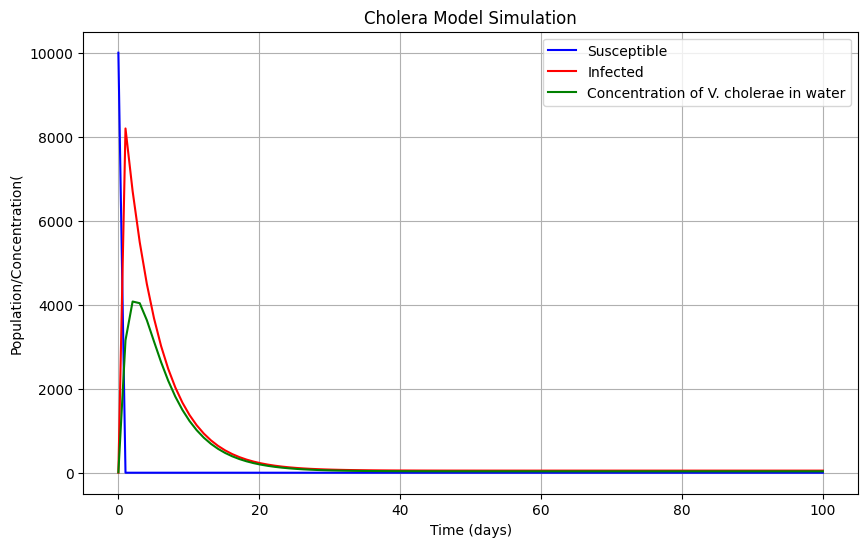

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, B/10, 'g', label='Concentration of V. cholerae in water')
plt.xlabel('Time (days)')
plt.ylabel('Population/Concentration(')
plt.title('Cholera Model Simulation')
plt.legend()
plt.grid(True)
plt.show()
